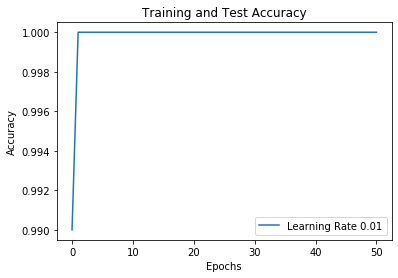

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data for a single class (class 0)
np.random.seed(0)
X_train = np.random.rand(100, 784)
y_train = np.zeros(100)

X_test = np.random.rand(20, 784)
y_test = np.zeros(20)

# Define the Perceptron class
class Perceptron:
    def __init__(self, input_size):
        self.weights = np.random.uniform(-0.05, 0.05, input_size)
        self.bias = 0.0

    def predict(self, inputs):
        activation = np.dot(inputs, self.weights) + self.bias
        return 1 if activation > 0 else 0

    def train(self, inputs, target, learning_rate):
        prediction = self.predict(inputs)
        error = target - prediction
        self.weights += learning_rate * error * inputs
        self.bias += learning_rate * error

# Define a function to train and evaluate the perceptron model
def train_and_evaluate(learning_rate):
    perceptron = Perceptron(784)
    train_accuracy = []
    test_accuracy = []

    for epoch in range(51):
        correct_train = 0
        for i in range(len(X_train)):
            target = 1 if y_train[i] == 0 else 0
            prediction = perceptron.predict(X_train[i])
            perceptron.train(X_train[i], target, learning_rate)
            if prediction == target:
                correct_train += 1

        train_accuracy.append(correct_train / len(X_train))

        correct_test = 0
        for i in range(len(X_test)):
            tx`arget = 1 if y_test[i] == 0 else 0
            if perceptron.predict(X_test[i]) == target:
                correct_test += 1

        test_accuracy.append(correct_test / len(X_test))

    return train_accuracy, test_accuracy

# Perform the experiment for one learning rate
learning_rate = 0.01
train_acc, test_acc = train_and_evaluate(learning_rate)

# Plot training and test accuracy
plt.plot(range(51), train_acc, label=f'Learning Rate {learning_rate}')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy')
plt.legend()
plt.show()
